# Analysis and Classification of the SMS Spam Collection Data Set 

### Dataset Description
The SMS Spam Collection Dataset[2] corpus is a collection of 425 SMS spam messages was manually extracted from the Grumbletext[3] Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. Following that, a subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. In addition to that, a list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [1]. Furthermore, it incorporates the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at [4]. This corpus has been used for many research purposes.

## Problem Statement
As part of Assignment #5 of CSC_520 we have to able to build an instance of a classification model to correctly identify spam messages when presented as a text message. 

## Working procedure
### Setting up the directory, file and dataset paths
We have to set the working directory to sms spam dataset folder.

In [18]:
import os
os.chdir('C:/Users/saad6/Downloads/CSC-520/Assignment5/smsspamcollection') 
path = os.getcwd()
print(path)

C:\Users\saad6\Downloads\CSC-520\Assignment5\smsspamcollection


### Getting a feel of the data that needs to be processed
We look at the kind of data or unstructured text that we are handling.

In [19]:
import numpy as np
records=np.array([line.rstrip() for line in open("SMSSPAMCOLLECTION")])
print(records)
#print(len(records))

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'ham\tOk lar... Joking wif u oni...'
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'ham\tPity, * was in mood for that. So...any other suggestions?'
 "ham\tThe guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'ham\tRofl. Its true to its name']


### Reading the data
- Converting the CSV file into a table data structure named "records"

In [20]:
import pandas as pd
records = pd.read_csv("SMSSpamCollection", sep='\t',names=['label','text'])
records

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


- Maintaining two different arrays for label and text named "array_label" and "array_text" respectively.

In [21]:
array_label= records['label'].values
array_text=records['text'].values
len(array_text)

5572

In [22]:
length_ham = records[records['label'].values == 'ham'].text.apply(len).values
length_ham

array([111,  29,  49, ...,  57, 125,  26], dtype=int64)

In [23]:
length_spam = records[records['label'].values == 'spam'].text.apply(len).values
length_spam

array([155, 147, 157, 154, 136, 155, 149, 155, 158, 172, 120, 161, 152,
       159,  78, 137, 158, 158, 152, 144, 156, 156, 125, 162, 155, 159,
       124, 145, 152, 155, 156, 147,  72, 142, 137, 157, 145, 150, 154,
       121, 159, 133, 155, 159, 146, 138, 133, 157, 128, 158, 111, 150,
       148, 165, 129, 157, 149, 155, 156,  49, 106, 159, 162, 136, 157,
       162, 175, 161, 159, 146, 160, 169, 147, 146,  89, 144, 158, 111,
       146,  96, 159,  69,  99, 149, 126, 142, 148,  86, 135, 140, 130,
       148, 143, 136,  97,  59,  93, 153, 158, 111, 155, 160,  37, 161,
       145, 101, 148, 131, 102,  65,  95, 159, 149,  99, 129, 157, 160,
       152, 162, 141, 148, 133, 156, 161, 147, 152, 149, 155, 160, 153,
       158, 144, 160, 149, 134, 154, 156, 136, 132, 143, 127, 158, 162,
       155, 139, 158, 148, 132, 137,  41, 156, 141, 147, 150, 158, 156,
       101, 104, 135, 152, 143, 134, 156,  90, 152, 146, 141, 159,  69,
       156, 153, 156, 104, 120, 158, 115, 139, 155, 159, 154,  4

### Exploratory Data Analysis
At this stage we explore the dataset in terms of statistic that we have at hand. We report the statistics of the distribution of the "Ham" labelled text messages and the "Spam" labelled text messages

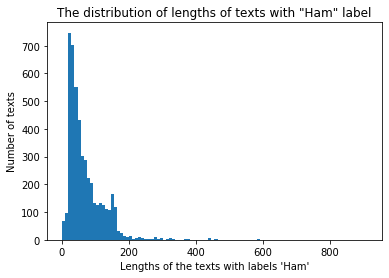

In [24]:
import matplotlib.pyplot as plt

plt.hist(length_ham, bins=100)
plt.xlabel('Lengths of the texts with labels \'Ham\'')
plt.ylabel('Number of texts')
plt.title('The distribution of lengths of texts with "Ham" label')

plt.show()


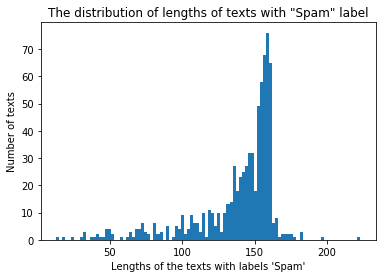

In [25]:
import matplotlib.pyplot as plt

plt.hist(length_spam, bins=100)
plt.xlabel('Lengths of the texts with labels \'Spam\'')
plt.ylabel('Number of texts')
plt.title('The distribution of lengths of texts with "Spam" label')

plt.show()

So, as we visualize the data, we see a clear distinction among the "Ham" labelled data instances and the "Spam" labelled data instances. To point it out, it can be seen that the "Ham" labelled data instances has text message length that peaks at around 100 units whereas, "Spam" labelled data instances that peaks at around 150 units. 

### Preprocessing the raw text data
Owing to the fact that the data was highly unstructured and unclean, there was an attempt made to clean and structure the data as much as possible so as to be able to extract the important features as efficiently as possible.
- **Converting the text into lower case**: As case will not affect the decision of whether we are classifying the data instances as spam or ham, we convert the raw text data into lower case. 

In [26]:
array_text=[elems.lower() for elems in array_text]
array_text[0]




'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

- **Removing the punctuations, numbers, websites** - In addition to converting the raw text data into lower case, the features of the text data that were irrelevant to the cause of the classification were filtered out. For example, all the punctuations, numbers and website information were removed so that it does obstruct the model in figuring out the correct features.

In [27]:
import string

array_text = [''.join(char for char in elems if char not in string.digits) for elems in array_text]
array_text = [''.join(char for char in elems if char not in string.punctuation) for elems in array_text]
array_text = [ elems.replace("www","") for elems in array_text]
array_text = [elems.replace("http","") for elems in array_text]
array_text[0]


'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

  - **Tokenizing and stemming the text** - To process the text data further, we tokenize the text data so that we can identify the distinct words that are occuring inside the data instances. In addition to that, stemming of the word was a particularly important thing to do in this case owing to the fact that words like 'looking' and 'look' were interpreted as two different words, whereas, essentially they yield the same meaning and value to our semantic feature extraction pipeline. Due to that, the Porter's Algorithm was used to morphologically normalize the words, so that features could be efficiently eked out. We have used the *nltk* library that contains the implementations of tokenizing words and stemming the words by Porters's Algorithm.

In [28]:
#import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


ps = PorterStemmer()

array_text = [word_tokenize(text) for text in array_text]
array_text = [' '.join(ps.stem(word) for word in text) for text in array_text]
#array_text = [word_tokenize(text) for text in array_text]
#text = ' '.join([ps.stem(word) for word in tokens])
    #print(text)
array_text[0]

'go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat'

### Feature Extraction and Engineering

The fundamental problem while working with language processing is that the classical machine learning algorithms cannot work on the raw text directly. Owing to that fact, raw unstructured text needs to go through some sort of feature engineering and selection to carve out the latent features that is embedded in the data. The most generalized way of converting the raw text data to perf is *quantitative vectorization* of the  Some of the most common feature engineering technique in the case of raw unstructured data is the Bag Of Words technique(BOW) and term frequency-inverse document frequency(TF-IDF). I have decided to go on and use the TF-IDF text vectorizer in this case owing to several disadvantages that BOW model has. For example, TF-IDF extracts out important information embedded in the text data that might not occur frequently due to the introduction of a term weights in the vector space model. 

To elaborate on the procedureas to which TF-IDF selects the data, we need to figure out the meanings for Term Frequency(TF) and Inverse Document Frequency(IDF). Term frequency refers to the frequency at which a term appears in the entire document, considering a corpus that is a collection of documents. On the other hand, inverse term frequency represents the frequency of the term across the documents in the corpus. In simple terms, it puts emphasis on the words which occur in very few documents, or attaches a higher IDF score to it. Considering the following, we intend to eke out the features out of the preprocessed text documents. Therefore, what we set out to do is to rank the features based on term-frequency across the corpus. 

To implement the feature extraction pipeline, I made use of the TfidfVectorizer module of the scikit-learn package that converted the preprocessed text into a sparse matrix of features. We have used a cap for the value of the number of features at 5000. This generates a matrix of 5572 by 5000 given that we could extract 5000 features from the text dataset.  

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vc = TfidfVectorizer(analyzer='word',stop_words = 'english',max_features = 5000)
array_text = vc.fit_transform(array_text)
array_text

<5572x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 40206 stored elements in Compressed Sparse Row format>

### Evaluation Method
Given the concern that with less training data, the model will not be able to capture the variances and nuances of the dataset.
We have decided to split the dataset in a 80-20 train-test ratio using the rule of thumb defined by the Pareto Principle[8] which assumes that, for many events, roughly 80% of the effects come from 20% of the causes. 

In addition to that, we calculate the *accuracy*, *precision*, *recall* and *F-1 scores* to evaluate the model on the 20% of the total dataset. As because, false positives and false negatives are of equal significance in this particular dataset, both recall and precision are equally important and that is why we further calculate the F-1 score, the harmonic mean of recall and precision. In addition to that, reporting the accuracy of the model is highly important in this particular context as because it gives us an insight of the number of data instances the model got wrong.

In [30]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(array_text, array_label, test_size = 0.2, random_state = 1)

### Classification Model
We have used *Decision Tree classifier* due to the simplicity and ease of interpretation.  

Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree. So, a decision tree as a whole builds up a decision tree from training instances using several splitting criteria of the nodes such as Entropy, Gini Index, Misclassification Rate,etc and hence predicts classes for novel testing examples. In our case, we have made use of entropy as the splitting criteria as because, the splitting criterias such as entropy, Gini Index , Misclassification rates perform almost the same in a range of datasets[7]. In addition to that, we used a height cut off for our decision tree, to avoid overfitting.

The decision tree is often considered a white box type of ML algorithm, due to using a form of internal decision-making. It implies that the extracted knowledge from a data set can be easily represented in a readable form. In addition to that, it requires its users minimal effort for data preparation and analysis. Given the fact that Decision Trees are non-parametric, it is immune to the distributions and does not depend on probability distribution assumptions. Furthermore. decision trees are excellent while handling high dimensional data[6]. So, given the high dimensionaility of our extracted features from our dataset, and given the non-parametric approach of decision trees in handling data, I have chosen decision trees to perform the classification based on the features. In addition to that, as a decision tree does not require normalization and scaling of data it fits well in this context.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(criterion="entropy",max_depth=20)
clf = clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)
print(yPred)
print(yTest)
print("Accuracy: ", metrics.accuracy_score(yTest,yPred))

from sklearn.preprocessing import label_binarize
binarized_yTest = label_binarize(yTest,classes=['ham','spam'])
binarized_yPred = label_binarize(yPred,classes=['ham','spam'])
# precision tp / (tp + fp)
precision = metrics.precision_score(binarized_yTest, binarized_yPred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(binarized_yTest, binarized_yPred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(binarized_yTest, binarized_yPred)
print('F1 score: %f' % f1)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Accuracy:  0.9623318385650225
Precision: 0.900763
Recall: 0.802721
F1 score: 0.848921


### Problems Faced and Discussion
1. Choosing the value for max features cap-off was a challenge for this particular task. I have tried several other values for choosing an appropriate value for the number of features. Experimenting by changing the number of features selected by 500, I was able to select an appropriate value for number of features of 5000 which yielded a particularly high accuracy. 
2.  As I have chosen Decision Trees as our classifier model which is particularly well known for being vulnerable to the problem of overfitting, I have decided to prune the tree and limit the height of the tree to 20, to avoid the risk of overfitting of the data. I have based my decision of pruning the tree at length = 20, because the accuracy does not significantly increase as I increase the depth further.
3. In the text preprocessing step of our pipeline, tokenization alone was not enough to clean the data efficiently. it is because words such as "come", "coming" were not considered to have the same semantic meaning. Therefore, I have decided to use stemming on the word tokens so that the words with same semantic meaning can be segregated appropriately.
4. In addition to that, removing redundant terms such as numbers, websites that are not of any particular value in extracting the features from the dataset are dropped from the text.
 

#### References
[1] https://etheses.bham.ac.uk/id/eprint/253/1/Tagg09PhD.pdf <br />
[2] http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection <br />
[3] http://www.grumbletext.co.uk/ <br />
[4] http://www.esp.uem.es/jmgomez/smsspamcorpus/ <br />
[5] Willett, Peter. "The Porter stemming algorithm: then and now." Program (2006). <br />
[6] Lin, Guosheng, et al. "Fast supervised hashing with decision trees for high-dimensional data." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2014. <br />
[7] Raileanu, Laura Elena, and Kilian Stoffel. "Theoretical comparison between the gini index and
information gain criteria." Annals of Mathematics and Artificial Intelligence 41.1 (2004): 77-93 <br />
[8] https://en.wikipedia.org/wiki/Pareto_principle <br />
